In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.datasets as ds
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
gold_data = pd.read_csv("gold_price_data.csv")
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,05/08/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,05/09/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,05/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
# Get rows and columns
gold_data.shape

(2290, 6)

In [4]:
# Getting basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
# Checking the missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
# Getting statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
# Checking the correlation
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%m/%d/%Y')
correlation = gold_data.corr()
correlation

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

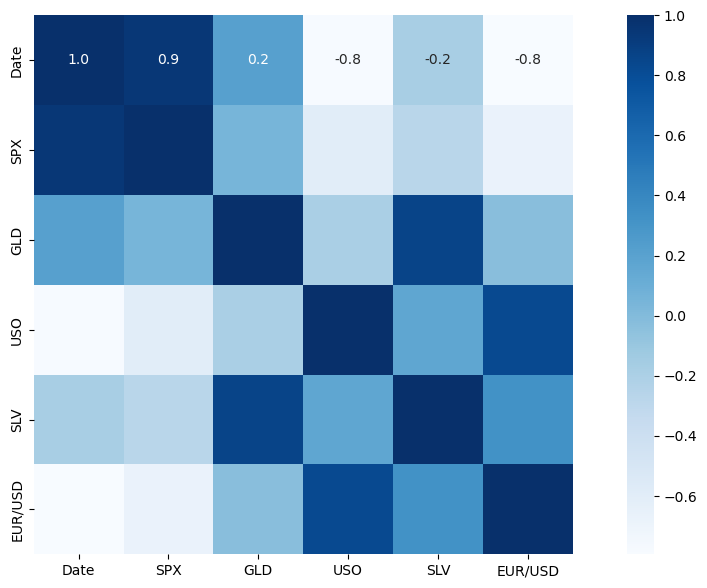

In [9]:
# Creating the heatmap for the correlation
plt.figure(figsize=(14,7))
sns.heatmap(correlation,annot=True,cbar=True,square=True,fmt='.1f',cmap='Blues')

In [11]:
# Correlations of the GLD
correlation['GLD']

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\Monish. S\AppData\Local\Temp\ipykernel_2184\4232607988.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='g')
D:\IDE\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

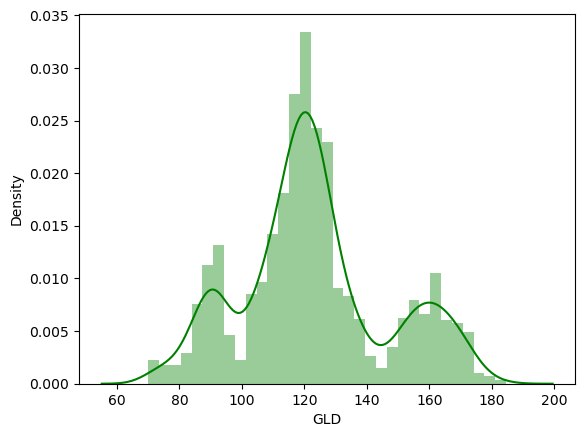

In [15]:
# Checking the distributions of the gold price
sns.distplot(gold_data['GLD'],color='g')

In [68]:
# Splitting the features and the targets
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [70]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [72]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [74]:
# Splitting into training data and the test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [75]:
# Model training
regressor = RandomForestRegressor(n_estimators=100)

In [78]:
# Train the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [79]:
# Prediction on the train data
train_data_predictions = regressor.predict(X_train)
train_data_predictions

array([ 91.39239847,  90.87300073,  97.44840106, ..., 104.78010035,
       108.41309859, 127.81789904])

In [80]:
# Prediction on the test data
test_data_predictions = regressor.predict(X_test)
test_data_predictions

array([164.34829951, 127.33979997, 124.10789963, 119.82539884,
       126.21519905,  85.07389796, 171.87540216, 137.71750038,
       106.52110051, 132.54730194, 120.43019944, 124.8217005 ,
       143.77469709, 104.62849934,  80.7747992 , 120.97849955,
       140.56110002,  90.70750068,  91.3696993 , 128.200902  ,
       125.53910034, 147.63119975, 116.69980139, 151.78320047,
       129.22280061, 129.59290041, 118.16450103, 111.3946001 ,
       167.4368022 , 156.96760012, 125.88810191, 153.51620117,
       126.94809967, 122.52399761, 116.41490109, 154.22069988,
       115.03150001, 120.49770165, 103.81990188, 106.46160055,
       135.39129963,  86.19699968, 156.36240191, 121.42040027,
       122.55720056, 154.58580168, 120.15600011, 116.31160019,
       168.56750207, 117.07130029, 139.74620117, 162.03309853,
       158.45890079, 153.19370211, 124.24750016, 117.3698002 ,
       167.21789998, 117.29649949, 165.61310039,  83.77499976,
       121.43369874, 122.43749974, 119.97230019, 172.07

In [81]:
# Model evaluation using R squared
error_score_train = r2_score(y_train,train_data_predictions)
error_score

0.9984410777101225

In [82]:
# Model evaluation using R squared
error_score_test = r2_score(y_test,test_data_predictions)
error_score

0.9984410777101225

In [83]:
# Compare the actual values and the predicted values
y_test = list(y_test)

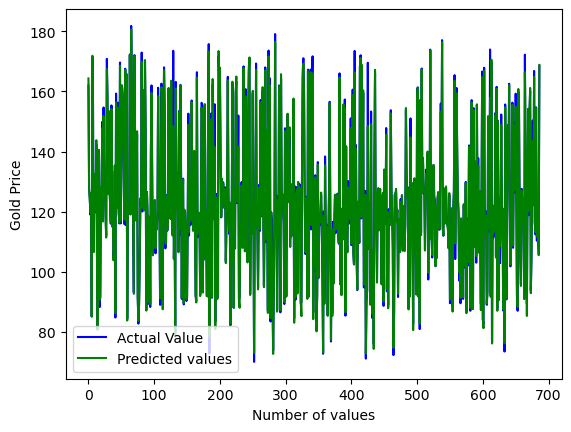

In [84]:
plt.plot(y_test,color='blue',label = "Actual Value")
plt.plot(test_data_predictions,color='g',label="Predicted values")
plt.xlabel("Number of values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()